In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
import os
os.makedirs("/content/dataset")

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Tue Jul 12 12:45:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W /  70W |    264MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! sudo cp -v -r "/content/gdrive/MyDrive/cse498r/AICE_project_2.zip" "/content/dataset"


'/content/gdrive/MyDrive/cse498r/AICE_project_2.zip' -> '/content/dataset/AICE_project_2.zip'


In [ ]:
! unzip /content/dataset/AICE_project_2.zip  -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13483.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13484.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13485.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13486.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13487.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13488.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13489.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13490.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13491.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_project_all_txt/image13492.txt  
  inflating: /content/dataset/AICE_project_all_txt/AICE_pro

In [ ]:
import torch
import os
from random import choice
import shutil
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
%matplotlib inline

from PIL import Image
from torchvision.datasets import ImageFolder
%matplotlib inline


In [ ]:
! sudo cp -v -r "/content/gdrive/MyDrive/cse498r/yolov5-master" "/content/dataset"


'/content/gdrive/MyDrive/cse498r/yolov5-master' -> '/content/dataset/yolov5-master'
'/content/gdrive/MyDrive/cse498r/yolov5-master/requirements.txt' -> '/content/dataset/yolov5-master/requirements.txt'
'/content/gdrive/MyDrive/cse498r/yolov5-master/README.md' -> '/content/dataset/yolov5-master/README.md'
'/content/gdrive/MyDrive/cse498r/yolov5-master/.pre-commit-config.yaml' -> '/content/dataset/yolov5-master/.pre-commit-config.yaml'
'/content/gdrive/MyDrive/cse498r/yolov5-master/.gitignore' -> '/content/dataset/yolov5-master/.gitignore'
'/content/gdrive/MyDrive/cse498r/yolov5-master/.gitattributes' -> '/content/dataset/yolov5-master/.gitattributes'
'/content/gdrive/MyDrive/cse498r/yolov5-master/train.py' -> '/content/dataset/yolov5-master/train.py'
'/content/gdrive/MyDrive/cse498r/yolov5-master/hubconf.py' -> '/content/dataset/yolov5-master/hubconf.py'
'/content/gdrive/MyDrive/cse498r/yolov5-master/LICENSE' -> '/content/dataset/yolov5-master/LICENSE'
'/content/gdrive/MyDrive/cse498r/y

In [ ]:
%cd /content/dataset/yolov5-master

/content/dataset/yolov5-master


In [ ]:
ls /content/dataset/yolov5-master

CONTRIBUTING.md  export.py   models/           setup.cfg       utils/
data/            hubconf.py  README.md         train.py        val.py
detect.py        LICENSE     requirements.txt  tutorial.ipynb


In [ ]:
!pip install -r requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
PATH = '/content/dataset/'
IMG_PATH = '/content/dataset/AICE_project_all_images/AICE_project_all_images/'
TXT_PATH = '/content/dataset/AICE_project_all_txt/AICE_project_all_txt/'

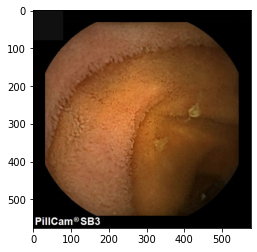

In [ ]:
img = cv2.imread("/content/dataset/AICE_project_all_images/AICE_project_all_images/image00165.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

In [ ]:
df = pd.read_csv(PATH + "all_annotation.csv")
df.head()


,annotation_class_name,image_number,angiodysplasia,erosion,stenosis,lymphangiectasia,lymph follicle,SMT,polyp-like,bleeding,diverticulum,erythema,foreign body,vein,annotation_number
0,annotation_class_number,NaN,0,1,2,3,4,5,6,7,8,9,10,11,NaN
1,NaN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,NaN,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,NaN,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
def classCount(labelPath):
  c0 = 0
  c1 = 0
  c2 = 0
  c3 = 0
  c4 = 0
  c5 = 0
  c6 = 0 
  c7 = 0
  c8 = 0
  c9 = 0
  c10 = 0 
  c11 = 0
  c12 = 0

  for root, dirs, files in os.walk(labelPath):
    for file in files:
      if file.endswith('.txt'):
        lines = [line.rstrip('\n') for line in open(labelPath+file)]
        if lines != ['']:
          for line in lines:
            components = line.split(" ")
            category = components[0]
            if category == '0':
              c1 += 1
            elif category == '1':
              c2 += 1
            elif category == '2':
              c3 += 1
            elif category == '3':
              c4 += 1
            elif category == '4':
              c5 += 1
            elif category == '5':
              c6 += 1
            elif category == '6':
              c7 += 1
            elif category == '7':
              c8 += 1
            elif category == '8':
              c9 += 1
            elif category == '9':
              c10 += 1
            elif category == '10':
              c11 += 1
            elif category == '11':
              c12 += 1
            else:
              c0 += 1
          
                 
          
                
  print('FN:', c0)              
  print('Angiodysplasia:', c1)
  print('Erosion:', c2)
  print('Stenosis:', c3)
  print('Lymphangiectasia:', c4)
  print('Lymph follicle:', c5)
  print('SMT:', c6)
  print('Polyp-like:', c7)
  print('Bleeding:', c8)
  print('Diverticulum:', c9)
  print('Erythema:', c10)
  print('Foreign body:', c11)
  print('Vein:', c12)


In [ ]:
classCount(TXT_PATH)

FN: 0
Angiodysplasia: 931
Erosion: 5987
Stenosis: 445
Lymphangiectasia: 609
Lymph follicle: 6788
SMT: 542
Polyp-like: 3230
Bleeding: 868
Diverticulum: 54
Erythema: 1019
Foreign body: 1646
Vein: 914


In [ ]:
totalImgCount = len(os.listdir(IMG_PATH))
totalImgCount


18481

In [ ]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo5"
INPUT_PATH = "mydrive/CSE-465/yolov5/micrography/camera_micrography"

In [ ]:
def boxesFromYOLO(IMG_PATH,TXT_PATH):
    image = cv2.imread(IMG_PATH)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(TXT_PATH)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])

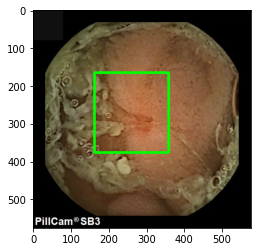

In [ ]:
img,boxes = boxesFromYOLO("/content/dataset/AICE_project_all_images/AICE_project_all_images/image11450.jpg","/content/dataset/AICE_project_all_txt/AICE_project_all_txt/image11450.txt")
showBoxes(img,boxes)

In [ ]:
imgs =[]
xmls =[]

labelPath = "/content/dataset/AICE_project_all_txt/AICE_project_all_txt"
imagePath = "/content/dataset/AICE_project_all_images/AICE_project_all_images"

train_ratio = 0.8
val_ratio = 0.2
#total count of imgs
totalImgCount = int(len(os.listdir(labelPath)))

for (dirname, dirs, files) in os.walk(imagePath):
  for filename in files:
    imgs.append(filename)
            
for (dirname, dirs, files) in os.walk(labelPath):
  for filename in files:
    xmls.append(filename)

#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  14784
Validation images are :  3696


In [ ]:
len(imgs)

18481

In [ ]:
os.makedirs("/content/dataset/yolov5/Dataset/images/train")
os.makedirs("/content/dataset/yolov5/Dataset/labels/train")
os.makedirs("/content/dataset/yolov5/Dataset/images/valid")
os.makedirs("/content/dataset/yolov5/Dataset/labels/valid")

In [ ]:
trainimagePath = '/content/dataset/yolov5/Dataset/images/train'
trainlabelPath = '/content/dataset/yolov5/Dataset/labels/train'
length = len(imgs)
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileTxt = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(imagePath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.move(os.path.join(labelPath, fileTxt), os.path.join(trainlabelPath, fileTxt))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileTxt)



In [ ]:
valimagePath = '/content/dataset/yolov5/Dataset/images/valid'
vallabelPath = '/content/dataset/yolov5/Dataset/labels/valid'

#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileTxt = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.move(os.path.join(imagePath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.move(os.path.join(labelPath, fileTxt), os.path.join(vallabelPath, fileTxt))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileTxt)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)


In [ ]:
%cd /content/dataset/yolov5-master

/content/dataset/yolov5-master


In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.8 MB/s 
     |████████████████████████████████| 146 kB 72.7 MB/s 
     |████████████████████████████████| 181 kB 69.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=17d878267002e7abfcef7ca887336701dbc4020ddb3310b456d3067aafaec3ef
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
! python train.py --img 640 --batch 20 --epochs 30 --data smallIntestine.yaml --weights yolov5s.pt 

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
for root, dirs, files in os.walk(labelPath):
    for file in files:
      if file.endswith('.txt'):
        lines = [line.rstrip('\n') for line in open(labelPath+file)]
        if lines != ['']:
          for line in lines:
            components = line.split(" ")
            category = components[0]
            if category == '0':
              xmls.append(file)
            elif category == '1':
             
            elif category == '2':
              
            elif category == '3':
             
            elif category == '4':
              
            elif category == '5':
              
            elif category == '6':
              
            elif category == '7':
             
            elif category == '8':
             
            elif category == '9':
             
            elif category == '10':
              
            elif category == '11':

            else:


IndentationError: ignored

In [ ]:
for file in xmls:
  lines = [line.rstrip('\n') for line in open(file)]
  if lines != ['']:
    for line in lines:
      components = line.split(" ")
      category = components[0]


FileNotFoundError: ignored